# Training a Simple Image Classifier using Convolutional Neural Networks 

## Identifying Handwritten Digits (MNIST)

__Objective__: Create a CNN (Convolutional Neural Network) model. Use this model to classify handwritten digits.

__Workflow__:
1.  Load in the `MNIST` dataset and examine its structure.
    - Use any library to load the MNIST dataset (included with both TensorFlow and PyTorch modules).
    - Take a closer look at the data inspecting it's size, shape, and quantity.
    - View some random samples using either OpenCV or Matplotlib (or others) of the handwritten digits and observe the complexity of the images. Do you have any issues identify these written numbers?
2.  2.  Using `numpy` or other libraries prepare your dataset for training.
    - Ensure the format or shape of the data is appropriate for input into your model (one-hot-encoding is needed for the labels)
    - Ensure data types are correct and that data is normalized. 
3.  Create a CNN with these specifications:
    - Input Dimensions of 28 x 28 x 1 
    - Two Convolution Layers (Kernel Size 3x3). The first with 64 filters, the second with 32. Use `ReLU` as the activation layer.
    - Max Pooling of size 2 x 2
    - Dropout Rate of 0.25
    - Add a Dense Layer comprising of 128 outputs
    - Add another Dropout Layer using a rate setting of 0.5
    - Add the final Dropout Layer that indicates the class probabilities
4.  Train this CNN on the `MNIST` dataset your prepared in Step 2
    - Train for at least 10 Epochs using a batch size of 32
5.  Plot graphs showing how your training and validation loss and accuracy changed with respect to the Epochs completed. 
6.  Save your model, you will be using it in the second milestone.
7.  Test your model on some random samples from the test dataset.

__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take the `MNIST` dataset, view samples, convert it into the right shape/format as required by your deep learning library. You are required to train the model using the specifications provided. You should save your model as you'll need it for further analysis in the second milestone.

#Resources
Deep Learning with Python, Second Edition 
- 1.2 [Chapter 5 Deep learning for computer vision](https://livebook.manning.com/book/deep-learning-with-python/chapter-5/1
)
    - 5.1 Introduction to covnets
        - 5.1.1 The convolution operation
        - 5.1.2 The max-pooling operation



### Load our Handwritten Digit Dataset (MNIST)

In [4]:
from tensorflow.keras.datasets import mnist

# Loads the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Display the number of samples in x_train, x_test, y_train, y_test
from numpy import shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### Let's take a look at some of images in this dataset


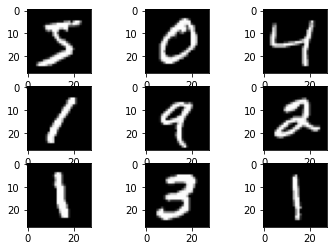

In [6]:
# importing matplotlib
# You may need to run this twice as matplotlib doesn't generate the plot in the same cell where it was imported
import matplotlib.pyplot as plt

# Plots 6 images, note subplot's arugments are nrows,ncols,index
# we set the color map to grey since our image dataset is grayscale
for i in range(9):  
 plt.subplot(330 + 1 + i)
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# Display out plots
plt.show()

### Preparing our dataset for Keras

- Keras requires our input data as a 4-Dimensional shape of (60000,28,28,1). When we initially loaded our data, x_train was (60000,28,28).
- We needs our labels to be one-hot-encoded

In [7]:
# Lets store the number of rows and columns
width, height = x_train.shape[1], x_train.shape[2]

# Getting our data in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our data thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape((x_train.shape[0], width, height, 1))
x_test = x_test.reshape((x_test.shape[0], width, height, 1))
# store the shape of a single image for future use as a variable storing our input shape
input_shape = x_train[0].shape
print(input_shape)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train = x_train / 255
x_test = x_test / 255


(28, 28, 1)


#### Performing one-hot-econding of our data labels

In [10]:
from tensorflow.keras.utils import to_categorical

# Now we one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Let's count the number columns in our hot encoded matrix 
print(shape(y_train))
print(shape(y_test))

num_classes = y_test.shape[1]

(60000, 10)
(10000, 10)


# Creating our Convolution Neural Network Model

![alt text](https://raw.githubusercontent.com/rajeevratan84/MasterOpenCV/master/CNN2.JPG "Our Convolutional Neural Network")


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# create model
model = Sequential()

# Our First Convolution Layer, Filter size 32 which reduces our layer size to 26 x 26 x 32
# We use ReLU activation and specify our input_shape which is 28 x 28 x 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Our Second Convolution Layer, Filter size 64 which reduces our layer size to 24 x 24 x 64
model.add(Conv2D(64, (3, 3), activation='relu'))

# We use MaxPooling with a kernel size of 2 x 2, this reduces our size to 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2, 2)))

# We use a dropout P setting of 0.25 to reduce overfitting
model.add(Dropout(0.25))

# We then Flatten our tensor object before input into our Dense Layer
# A flatten operation on a tensor reshapes the tensor to have the shape that is 
# equal to the number of elements contained in tensor
# In our CNN it goes from 12 * 12 * 64 to 9216 * 1
model.add(Flatten())

# We connect this layer to a Fully Connected/Dense layer of size 1 * 128
model.add(Dense(128, activation='relu'))

# We use another Dropout layer
model.add(Dropout(0.5))

# We create our final Fully Connected/Dense layer with an output for each class (10)
model.add(Dense(num_classes, activation='softmax'))

# We compile our model, this creates an object that stores the model we just created
# We set our Optimizer to use Stochastic Gradient Descent (learning rate of 0.01)
# We set our loss function to be categorical_crossentropy as it's suitable for multiclass problems
# Finally, the metrics (What we judge our performance on) to be accuracy
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

# We can use the summary function to display our model layers and parameters
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1179776   
                                                      

# Training our CNN

In [12]:
batch_size = 32
epochs = 10
from tensorflow.keras.callbacks import History

# Store our results here so we can plot later
# In our fit function we specify our datsets (x_train & y_train), 
# the batch size (typically 16 to 128 depending on your RAM), the number of 
# epochs (usually 10 to 100) and our validation datasets (x_test & y_test)
# verbose = 1, sets our training to output performance metrics every epoch
history = model.fit(x_train, y_train, batch_size, epochs, validation_data=(x_test, y_test))

# We obtain our accuracy score using the evalute function
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/10
1875/1875 [==============================] - 18s 4ms/step - loss: 0.5905 - accuracy: 0.8160 - val_loss: 0.1925 - val_accuracy: 0.9435
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.9143 - val_loss: 0.1363 - val_accuracy: 0.9601
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2167 - accuracy: 0.9359 - val_loss: 0.1002 - val_accuracy: 0.9698
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1712 - accuracy: 0.9500 - val_loss: 0.0838 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1395 - accuracy: 0.9585 - val_loss: 0.0659 - val_accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1210 - accuracy: 0.9638 - val_loss: 0.0569 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1055 - accuracy: 0.9689 - val_loss: 0.0543 - val_accuracy

## Plotting our training progress 
Plot our Loss vs Epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


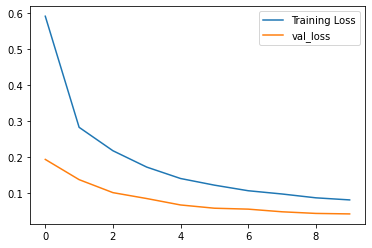

In [14]:
# Plotting our loss charts

# Use the History object we created to get our saved performance results
print(history.history.keys())

# Extract the loss and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']
# Get the number of epochs and create an array up to that number using range()
epoch_range = range(epochs)
# Plot line charts for both Validation and Training Loss
plt.plot(loss, label = 'Training Loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

[0.9434999823570251, 0.960099995136261, 0.9697999954223633, 0.9743000268936157, 0.9793000221252441, 0.9829000234603882, 0.9825999736785889, 0.9847000241279602, 0.9855999946594238, 0.9876000285148621]


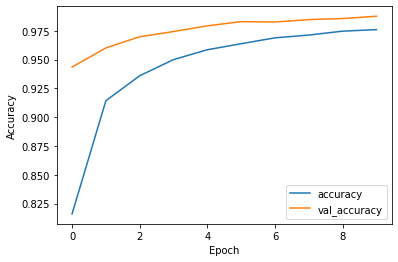

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(val_accuracy)
# Plotting our accuracy charts
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Saving and loading your model

In [ ]:
from tensorflow.keras.models import load_model
model.save('model1.1')
del model

INFO:tensorflow:Assets written to: model1.1/assets


In [ ]:
model = load_model('model1.1')

# Testing out Model on some random Test Data

1	0	3	1	4	

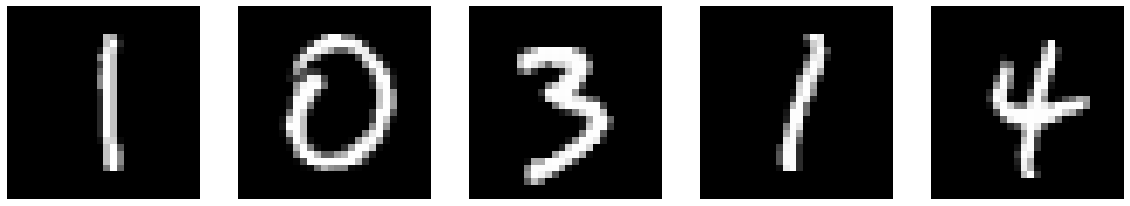

In [16]:
import numpy as np

figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx,:,:,0],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

# Summary

In this notebook we:

* Loaded the MNIST Dataset
* Trained a Convolutional Neural Network on the MNIST dataset
* Tested our model on some of test data

The end deliverable from this section is a trained CNN using the architecture described for at least 10 epochs. The expected accuracy of your model should be at least 98%. In the next section, we will use the model you saved and try to understand what the model actually 'learnt'.